In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Generar los equipos con sus jugadas y temporadas 

In [2]:
class equipo:
    def __init__(self, name):
        self.name = name
        self.play_values=['% Time','PPP','aFG%']
        self.temporadas=set()
        self.play={}
    
    def jugada(self,tipo,stats):
        if tipo not in self.play:
            self.play[tipo]=[stats]
        else:
            self.play[tipo].append(stats)
            
    def current_temporada(self,tempo):
        self.temporadas.add(tempo)
        
    def list_temporadas(self,tempo):
        self.temporadas=[x for x in tempo if x in self.temporadas]

In [3]:
path1=r'D:/LNB/LNB ULTIMAS 5 TEMPORADAS'
temporada=os.listdir(path1)

path2=path1 + '/' + temporada[-1]
pos=os.listdir(path2)

path3 = path2 + '/' + pos[0]
jugada=os.listdir(path3)
jugada.remove('~�LONG RANGE.xlsx')

#path = path3 + '/' + jugada[1]

In [4]:
##no son los mismos equipos por temporada hay que generarlos de forma ineficiente lamentablemente
teams=set()
for k in temporada:
    path = path1 + '/' + k + '/' + pos[0] + '/' + jugada[1]
    df=pd.read_excel(path,header=3)
    teams.update(df['Team'].tolist())
    
equipos=[]
for i in teams:
    equipos.append(equipo(i))

In [5]:
print(temporada)

['15 16', '16 17', '17 18', '18 19', '19 20']


In [6]:
print(teams,len(teams))

{'Centro Juventud Sionista', 'Asociación Deportiva Atenas', 'Gimnasia y Esgrima Comodoro Rivadavia', 'Obras Basket', 'Asociacion Atletica Quimsa', 'La Union', 'Club Echague de Parana', 'Club San Martin', 'Club Atletico Argentino', 'Boca Juniors', 'Instituto Atletico Central Cordoba', 'Club Atlético Lanús', 'Club de Regatas Corrientes', 'San Lorenzo de Almagro', 'Quilmes de Mar del Plata', 'Ferrocarril Oeste', 'Salta Basket', 'Club Deportivo Libertad', 'Peñarol Mar del Plata', 'Hispano Americano Rio Gallegos', 'Club Atletico Platense Florida', 'Club Estudiantes Concordia', 'Club Ciclista Olimpico', 'Club Comunicaciones Corrientes', 'Weber Bahia'} 25


In [5]:
temp_ppp=[]
temp_afg=[]
temp_pos=[]
temp_trans=[]

for k in temporada:
    for i in jugada:
        path = path1 + '/' + k + '/' + pos[0] + '/' + i
        df=pd.read_excel(path,header=3)
        temp_teams=df['Team'].tolist()
        
        ##guardar stats overall de la temporada
        if i == 'OVERALL.xlsx':
            temp_ppp.append([k,df['PPP'].tolist()])
            temp_afg.append([k,df['aFG%'].tolist()])
            temp_pos.append([k,df['Poss / Game'].tolist()])
        
        ##guardar proporción de transiciones de la temporada
        if i == 'TRANSITION.xlsx':
            temp_trans.append([k,df['% Time'].tolist()])
    
        for j in equipos:
            if j.name in temp_teams:
                vals=df.loc[df['Team'] == j.name][['% Time','PPP','aFG%']].values.tolist()[0]
                j.jugada(i,vals)
                j.current_temporada(k)

In [6]:
##los set no retienen orden
for i in equipos:
    i.list_temporadas(temporada)

### Se genera los objetos equipos que contienen 3 stats de cada tipo de jugada, por cada temporada de existencia del equipo en la liga

In [7]:
equipos[0].__dict__

{'name': 'Club Echague de Parana',
 'play_values': ['% Time', 'PPP', 'aFG%'],
 'temporadas': ['16 17'],
 'play': {'4 SEGUNDOS.xlsx': [[0.069, 0.609, 0.323]],
  'AROUND TO THE BASKET.xlsx': [[0.331, 1.147, 0.552]],
  'CUT.xlsx': [[0.065, 1.133, 0.621]],
  'HALF COURT.xlsx': [[0.853, 0.863, 0.487]],
  'HAND OFF.xlsx': [[0.019, 1.115, 0.606]],
  'ISOLATION.xlsx': [[0.079, 0.887, 0.427]],
  'LONG RANGE.xlsx': [[0.761, 1.002, 0.5]],
  'MID RANGE.xlsx': [[0.126, 0.839, 0.417]],
  'OFF REB.xlsx': [[0.054, 1.162, 0.607]],
  'OFF SCREEN.xlsx': [[0.04, 0.966, 0.515]],
  'OVERALL.xlsx': [[1.0, 0.889, 0.498]],
  'P&R PASS OUT.xlsx': [[0.183, 0.834, 0.529]],
  'P&R.xlsx': [[0.174, 0.689, 0.393]],
  'POST UP.xlsx': [[0.086, 0.697, 0.394]],
  'ROLL.xlsx': [[0.067, 0.948, 0.507]],
  'SPOT UP.xlsx': [[0.19, 1.021, 0.527]],
  'TRANSITION.xlsx': [[0.147, 1.042, 0.564]]}}

In [ ]:
##tenemos overall para ver el desempeño de un equipo en terminos de eficiencia. half court en oposición a transition.

In [11]:
overall='OVERALL.xlsx'
tipo1=['TRANSITION.xlsx','HALF COURT.xlsx']
tipo2=['LONG RANGE.xlsx','MID RANGE.xlsx','AROUND TO THE BASKET.xlsx']

jug=jugada.copy()
for i in ['TRANSITION.xlsx','HALF COURT.xlsx','OVERALL.xlsx','LONG RANGE.xlsx','MID RANGE.xlsx',
          'AROUND TO THE BASKET.xlsx']:
    jug.remove(i)

In [11]:
tott=0
for i in jug:
    tott+=equipos[0].play[i][0][0]
print(tott)

1.02


In [26]:
##hay superposición entre las jugadas, habría que seguir separando para que el total de 1

### ejemplo de uso

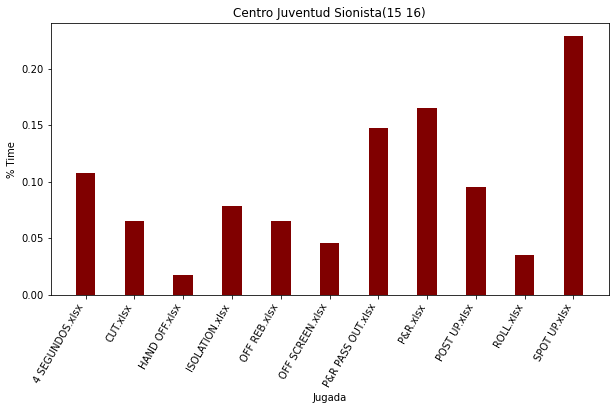

In [100]:
vals=[equipos[0].play[i][0][0] for i in jug]

fig = plt.figure(figsize = (10, 5))
 
plt.bar(jug, vals, color ='maroon',
        width = 0.4)

plt.xlabel("Jugada")
plt.ylabel(equipos[0].play_values[0])
plt.title(equipos[0].name + '('+equipos[0].temporadas[0]+')')
plt.xticks(rotation=60, ha='right')
plt.show()

## Evolución de la distribución de los valores overall de los equipos

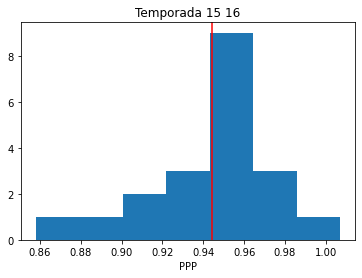

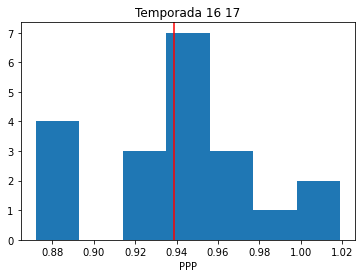

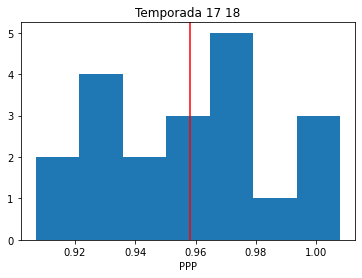

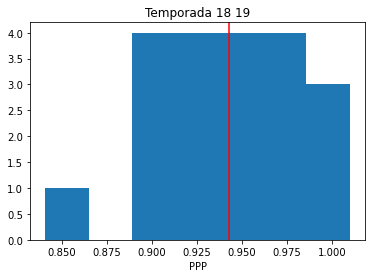

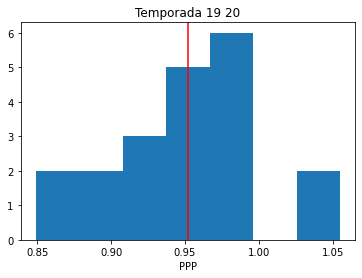

In [59]:
tot=[]
for i in temp_ppp:
    tot=tot+i[1]
    avg=np.mean(i[1])
    plt.hist(i[1],bins=7)
    plt.xlabel("PPP")
    plt.title('Temporada ' + i[0])
    plt.axvline(x=avg,c='red')
    plt.show()

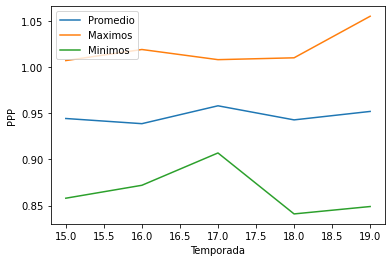

In [67]:
avgs=[np.mean(i[1]) for i in temp_ppp]
maxs=[np.max(i[1]) for i in temp_ppp]
mins=[np.min(i[1]) for i in temp_ppp]

años=[15,16,17,18,19]

plt.plot(años,avgs,label='Promedio')
plt.plot(años,maxs,label='Maximos')
plt.plot(años,mins,label='Minimos')

plt.xlabel("Temporada")
plt.ylabel('PPP')
plt.legend()
plt.show()

In [ ]:
##no hay una tendencia sensible en los ultimos 5 años, 20 equipos es muy poco para inferir nada en terminos de distribuciones.
##veamos que pasa si se combina todas la temporadas

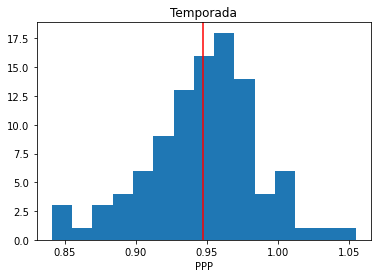

In [64]:
plt.hist(tot,bins=15)
plt.xlabel("PPP")
plt.title('Temporada')
plt.axvline(x=np.mean(tot),c='red')
plt.show()

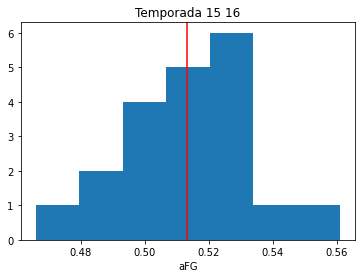

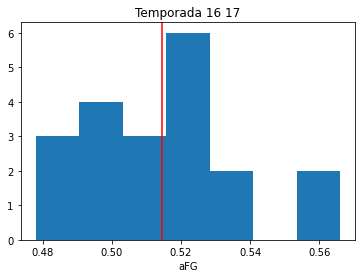

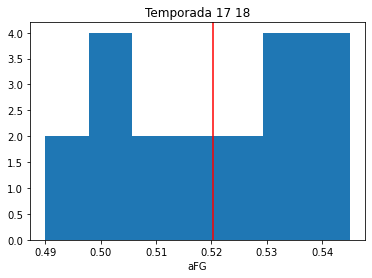

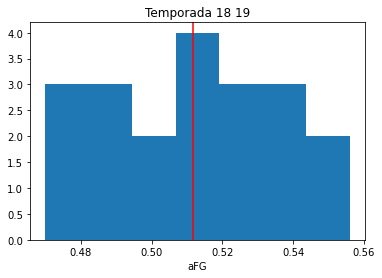

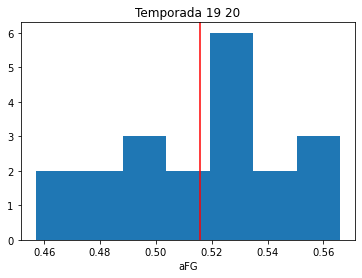

In [69]:
tot=[]
for i in temp_afg:
    tot=tot+i[1]
    avg=np.mean(i[1])
    plt.hist(i[1],bins=7)
    plt.xlabel("aFG")
    plt.title('Temporada ' + i[0])
    plt.axvline(x=avg,c='red')
    plt.show()

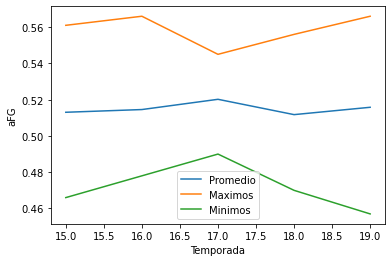

In [68]:
avgs=[np.mean(i[1]) for i in temp_afg]
maxs=[np.max(i[1]) for i in temp_afg]
mins=[np.min(i[1]) for i in temp_afg]

años=[15,16,17,18,19]

plt.plot(años,avgs,label='Promedio')
plt.plot(años,maxs,label='Maximos')
plt.plot(años,mins,label='Minimos')

plt.xlabel("Temporada")
plt.ylabel('aFG')
plt.legend()
plt.show()

In [ ]:
##en lo que respecta eficiencia ofensiva en general no ha habido una evolución aparente en los ultimos años.

## Evolución en la velocidad del juego 

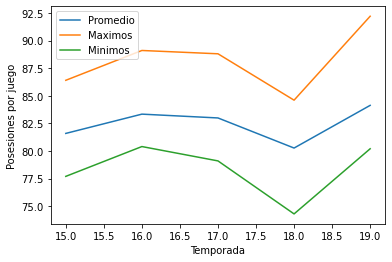

In [8]:
avgs=[np.mean(i[1]) for i in temp_pos]
maxs=[np.max(i[1]) for i in temp_pos]
mins=[np.min(i[1]) for i in temp_pos]

años=[15,16,17,18,19]

plt.plot(años,avgs,label='Promedio')
plt.plot(años,maxs,label='Maximos')
plt.plot(años,mins,label='Minimos')

plt.xlabel("Temporada")
plt.ylabel('Posesiones por juego')
plt.legend()
plt.show()

In [73]:
##el ritmo de juego tuvo un bache en la temporada 18-19 y luego repuntó con fuerza

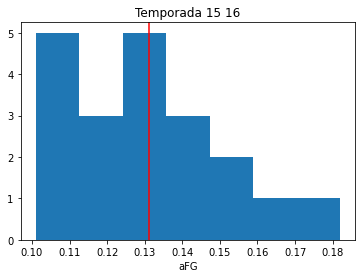

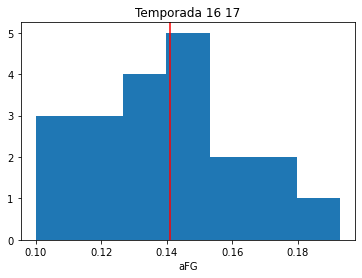

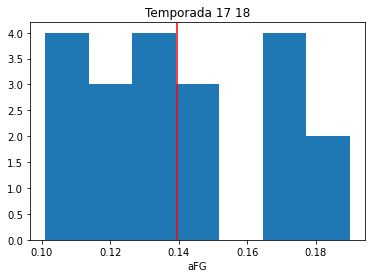

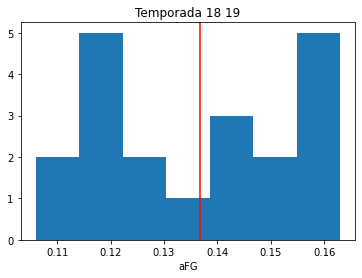

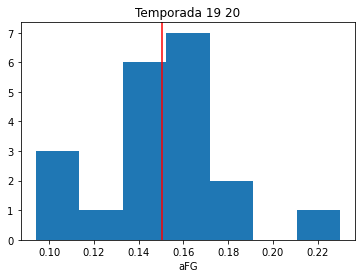

In [77]:
for i in temp_trans:
    tot=tot+i[1]
    avg=np.mean(i[1])
    plt.hist(i[1],bins=7)
    plt.xlabel("aFG")
    plt.title('Temporada ' + i[0])
    plt.axvline(x=avg,c='red')
    plt.show()

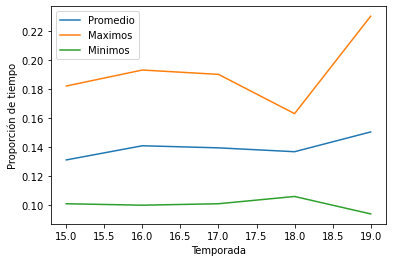

In [18]:
avgs=[np.mean(i[1]) for i in temp_trans]
maxs=[np.max(i[1]) for i in temp_trans]
mins=[np.min(i[1]) for i in temp_trans]

años=[15,16,17,18,19]

plt.plot(años,avgs,label='Promedio')
plt.plot(años,maxs,label='Maximos')
plt.plot(años,mins,label='Minimos')

plt.xlabel("Temporada")
plt.ylabel('Proporción de tiempo')
plt.legend()
plt.show()

In [ ]:
##se aprecia un leve aumento en la proporción de jugadas de transición, también la existencia de un equipo que "corrió" mucho más que el resto

## Rankeo de las jugadas según la temporada

### Distribución de tiempo 

In [107]:
ranks=[]
for i in temporada:
    rank_jug=[0 for i in range(len(jug))]
    for j in equipos:
        if i in j.temporadas:
            temp_pos=j.temporadas.index(i)
            count=0
            for k in jug:
                rank_jug[count] = rank_jug[count] + j.play[k][temp_pos][0]/20.
                count+=1
    ranks.append(rank_jug)      

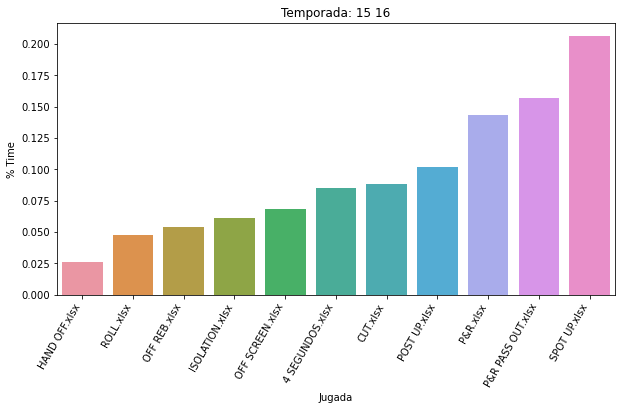

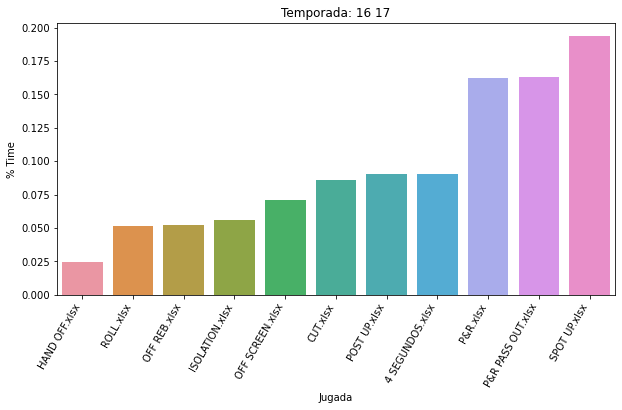

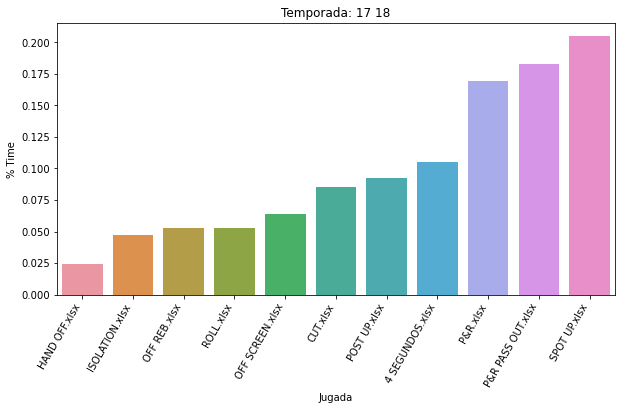

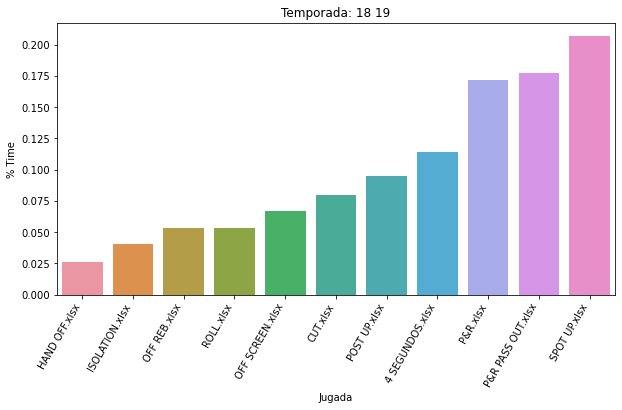

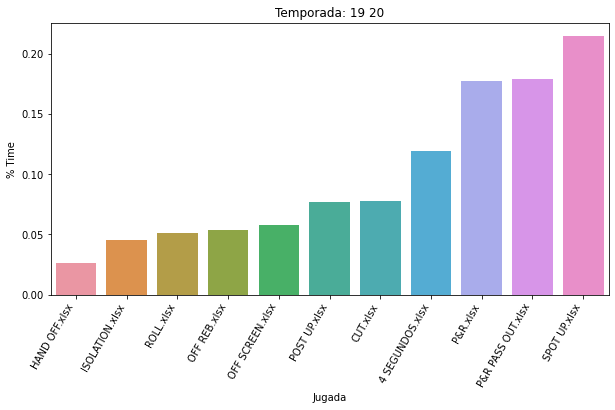

In [120]:
count=0
for i in ranks:
    order=np.argsort(i)
    fig = plt.figure(figsize = (10, 5))
 
    sns.barplot(x=np.array(jug)[order], y=np.array(i)[order])

    plt.xlabel("Jugada")
    plt.ylabel(equipos[0].play_values[0])
    plt.title('Temporada: ' + temporada[count])
    plt.xticks(rotation=60, ha='right')
    plt.show()
    count+=1

In [117]:
##Las jugadas que terminan en spot up ó derivadas de P&R son las más usuales en incluso se separaron un poco más del resto.
##Las jugadas de isolation perdieron bastante terreno, así como cut y los posteos en menor medida. Jugadas de 4 segundos 
##ascendieron para ubicarse como distintiva cuarta opción

array([0.02605, 0.04755, 0.05385, 0.0609 , 0.0683 , 0.08525, 0.0879 ,
       0.102  , 0.1431 , 0.15645, 0.20645])

### Eficiencia

In [125]:
ranks=[]
for i in temporada:
    rank_jug=[0 for i in range(len(jug))]
    for j in equipos:
        if i in j.temporadas:
            temp_pos=j.temporadas.index(i)
            count=0
            for k in jug:
                rank_jug[count] = rank_jug[count] + j.play[k][temp_pos][1]/20.
                count+=1
    ranks.append(rank_jug)

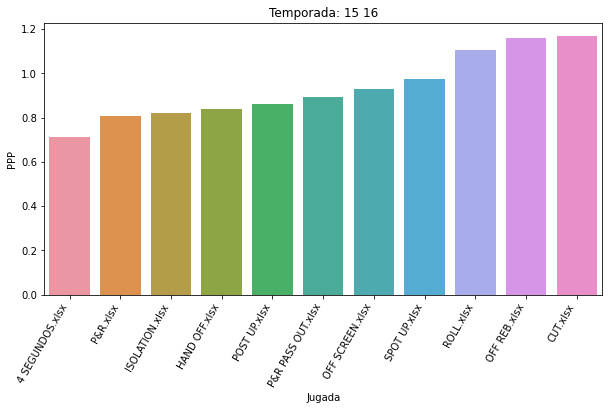

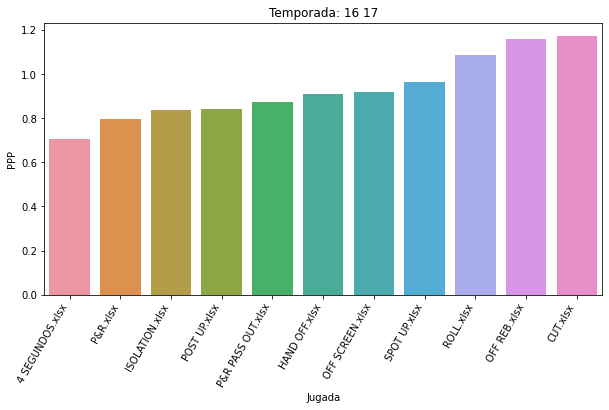

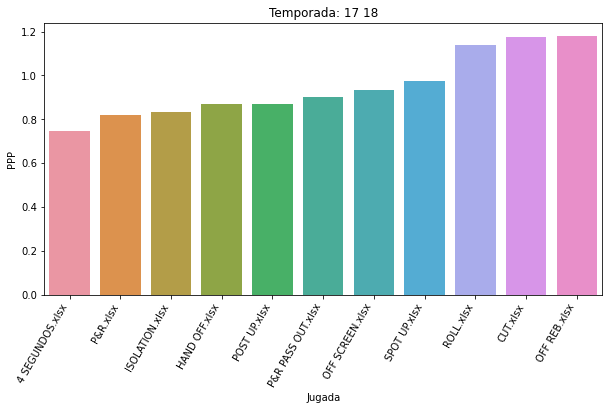

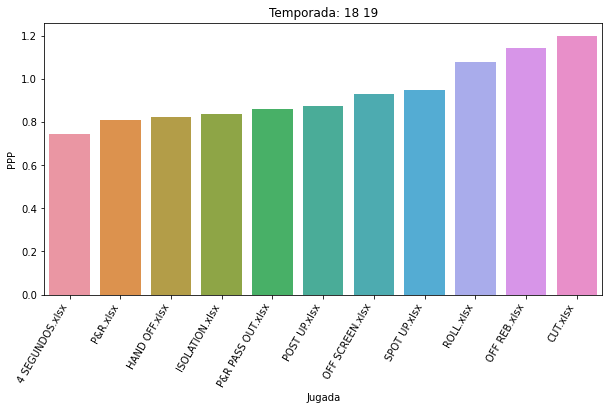

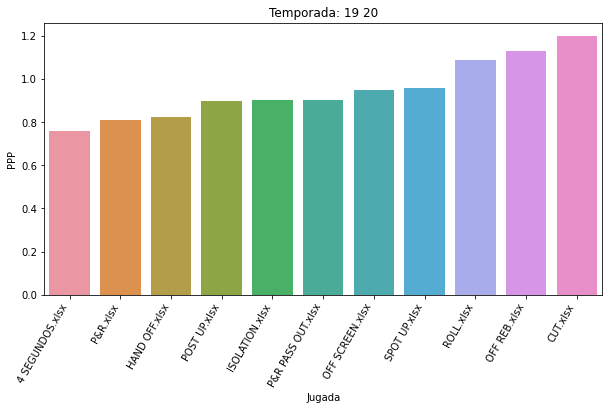

In [127]:
count=0
for i in ranks:
    order=np.argsort(i)
    fig = plt.figure(figsize = (10, 5))
 
    sns.barplot(x=np.array(jug)[order], y=np.array(i)[order])

    plt.xlabel("Jugada")
    plt.ylabel(equipos[0].play_values[1])
    plt.title('Temporada: ' + temporada[count])
    plt.xticks(rotation=60, ha='right')
    plt.show()
    count+=1

In [ ]:
##No muy sorpresivamente las jugadas que terminan en bandeja, volcada o un tiro cerca del aro con la defensa colapsada son 
##aquellas más rendidoras. Por otro lado, 4 segundos que favorece el ritmo de juego, es la peor rankeada.
##Las jugadas de isolation han experimentado un aumento en su eficacia

## Ubicación de los tiros

### Distribución de tiempo 

In [13]:
ranks=[]
for i in temporada:
    rank_jug=[0 for i in range(len(tipo2))]
    for j in equipos:
        if i in j.temporadas:
            temp_pos=j.temporadas.index(i)
            count=0
            for k in tipo2:
                rank_jug[count] = rank_jug[count] + j.play[k][temp_pos][0]/20.
                count+=1
    ranks.append(rank_jug)

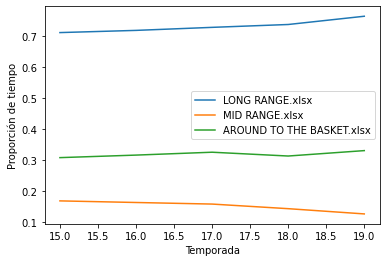

In [14]:
avgs=[i[0] for i in ranks]
maxs=[i[1] for i in ranks]
mins=[i[2] for i in ranks]

años=[15,16,17,18,19]

plt.plot(años,avgs,label=tipo2[0])
plt.plot(años,maxs,label=tipo2[1])
plt.plot(años,mins,label=tipo2[2])

plt.xlabel("Temporada")
plt.ylabel('Proporción de tiempo')
plt.legend()
plt.show()

In [15]:
##Media distancia está en caida mientras los otros dos posiciones mejoran

### Eficiencia

In [16]:
ranks=[]
for i in temporada:
    rank_jug=[0 for i in range(len(tipo2))]
    for j in equipos:
        if i in j.temporadas:
            temp_pos=j.temporadas.index(i)
            count=0
            for k in tipo2:
                rank_jug[count] = rank_jug[count] + j.play[k][temp_pos][1]/20.
                count+=1
    ranks.append(rank_jug)

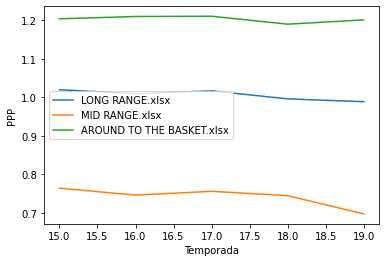

In [17]:
avgs=[i[0] for i in ranks]
maxs=[i[1] for i in ranks]
mins=[i[2] for i in ranks]

años=[15,16,17,18,19]

plt.plot(años,avgs,label=tipo2[0])
plt.plot(años,maxs,label=tipo2[1])
plt.plot(años,mins,label=tipo2[2])

plt.xlabel("Temporada")
plt.ylabel('PPP')
plt.legend()
plt.show()

In [ ]:
##No parece haber mejoras en la eficacia de las ubicaciones 

## Ensayo de Clustering

In [20]:
equipos[0].__dict__

{'name': 'Club Echague de Parana',
 'play_values': ['% Time', 'PPP', 'aFG%'],
 'temporadas': ['16 17'],
 'play': {'4 SEGUNDOS.xlsx': [[0.069, 0.609, 0.323]],
  'AROUND TO THE BASKET.xlsx': [[0.331, 1.147, 0.552]],
  'CUT.xlsx': [[0.065, 1.133, 0.621]],
  'HALF COURT.xlsx': [[0.853, 0.863, 0.487]],
  'HAND OFF.xlsx': [[0.019, 1.115, 0.606]],
  'ISOLATION.xlsx': [[0.079, 0.887, 0.427]],
  'LONG RANGE.xlsx': [[0.761, 1.002, 0.5]],
  'MID RANGE.xlsx': [[0.126, 0.839, 0.417]],
  'OFF REB.xlsx': [[0.054, 1.162, 0.607]],
  'OFF SCREEN.xlsx': [[0.04, 0.966, 0.515]],
  'OVERALL.xlsx': [[1.0, 0.889, 0.498]],
  'P&R PASS OUT.xlsx': [[0.183, 0.834, 0.529]],
  'P&R.xlsx': [[0.174, 0.689, 0.393]],
  'POST UP.xlsx': [[0.086, 0.697, 0.394]],
  'ROLL.xlsx': [[0.067, 0.948, 0.507]],
  'SPOT UP.xlsx': [[0.19, 1.021, 0.527]],
  'TRANSITION.xlsx': [[0.147, 1.042, 0.564]]}}

In [28]:
cols=['Equipo']
plays=list(equipos[0].play.keys())
plays.remove('OVERALL.xlsx')
valores=['_%Time','_aFG%']
for i in plays:
    cols.append(i.replace('.xlsx',valores[0]))
    cols.append(i.replace('.xlsx',valores[1]))

teams = pd.DataFrame(columns = cols)

In [33]:
teams

Empty DataFrame
Columns: [Equipo, 4 SEGUNDOS_%Time, 4 SEGUNDOS_aFG%, AROUND TO THE BASKET_%Time, AROUND TO THE BASKET_aFG%, CUT_%Time, CUT_aFG%, HALF COURT_%Time, HALF COURT_aFG%, HAND OFF_%Time, HAND OFF_aFG%, ISOLATION_%Time, ISOLATION_aFG%, LONG RANGE_%Time, LONG RANGE_aFG%, MID RANGE_%Time, MID RANGE_aFG%, OFF REB_%Time, OFF REB_aFG%, OFF SCREEN_%Time, OFF SCREEN_aFG%, P&R PASS OUT_%Time, P&R PASS OUT_aFG%, P&R_%Time, P&R_aFG%, POST UP_%Time, POST UP_aFG%, ROLL_%Time, ROLL_aFG%, SPOT UP_%Time, SPOT UP_aFG%, TRANSITION_%Time, TRANSITION_aFG%]
Index: []

[0 rows x 33 columns]

In [39]:
for k in equipos:
    for j in range(len(k.temporadas)):
        equip=[]

        equip.append(k.name+'_'+k.temporadas[j])
        for i in plays:
            equip.append(k.play[i][j][0])
            equip.append(k.play[i][j][1])
            
        teams.loc[len(teams)] = equip

In [40]:
teams

Equipo  4 SEGUNDOS_%Time  4 SEGUNDOS_aFG%  \
0     Club Echague de Parana_16 17             0.069            0.609   
1               Salta Basket_17 18             0.143            0.796   
2    Club Deportivo Libertad_15 16             0.086            0.679   
3    Club Deportivo Libertad_16 17             0.094            0.768   
4    Club Deportivo Libertad_18 19             0.107            0.785   
..                             ...               ...              ...   
95              Obras Basket_19 20             0.100            0.830   
96  Quilmes de Mar del Plata_15 16             0.076            0.676   
97  Quilmes de Mar del Plata_16 17             0.073            0.679   
98  Quilmes de Mar del Plata_17 18             0.069            0.614   
99  Quilmes de Mar del Plata_18 19             0.095            0.679   

    AROUND TO THE BASKET_%Time  AROUND TO THE BASKET_aFG%  CUT_%Time  \
0                        0.331                      1.147      0.065   
1                        0.291                      1.248      0.091   
2                        0.306                      1.186      0.082   
3                        0.342                      1.151      0.064   
4                        0.362                      1.171      0.116   
..                         ...                        ...        ...   
95                       0.360                      1.220      0.079   
96                       0.284                      1.245      0.063   
97                       0.305                      1.165      0.057   
98                       0.291                      1.206      0.072   
99                       0.271                      1.129      0.060   

    CUT_aFG%  HALF COURT_%Time  HALF COURT_aFG%  HAND OFF_%Time  ...  \
0      1.133             0.853            0.863           0.019  ...   
1      1.187             0.895            0.912           0.028  ...   
2      1.155             0.882            0.933           0.018  ...   
3      1.194             0.892            0.907           0.022  ...   
4      1.186             0.894            0.917           0.029  ...   
..       ...               ...              ...             ...  ...   
95     1.075             0.817            0.912           0.036  ...   
96     1.237             0.879            0.946           0.023  ...   
97     1.104             0.863            0.914           0.020  ...   
98     1.031             0.869            0.991           0.034  ...   
99     1.142             0.886            0.867           0.029  ...   

    P&R_%Time  P&R_aFG%  POST UP_%Time  POST UP_aFG%  ROLL_%Time  ROLL_aFG%  \
0       0.174     0.689          0.086         0.697       0.067      0.948   
1       0.184     0.837          0.095         0.793       0.043      1.306   
2       0.175     0.863          0.109         0.909       0.045      1.114   
3       0.213     0.877          0.052         0.768       0.044      1.014   
4       0.136     0.795          0.096         0.763       0.049      0.992   
..        ...       ...            ...           ...         ...        ...   
95      0.175     0.864          0.075         0.895       0.040      1.111   
96      0.168     0.908          0.080         0.944       0.039      1.142   
97      0.253     0.869          0.050         0.684       0.052      1.046   
98      0.212     0.873          0.086         1.007       0.057      1.267   
99      0.228     0.732          0.076         0.882       0.066      1.110   

    SPOT UP_%Time  SPOT UP_aFG%  TRANSITION_%Time  TRANSITION_aFG%  
0           0.190         1.021             0.147            1.042  
1           0.249         0.963             0.105            1.159  
2           0.254         0.956             0.118            1.206  
3           0.233         0.970             0.108            1.217  
4           0.219         0.950             0.106            1.148  
..            ...           ...               ...         

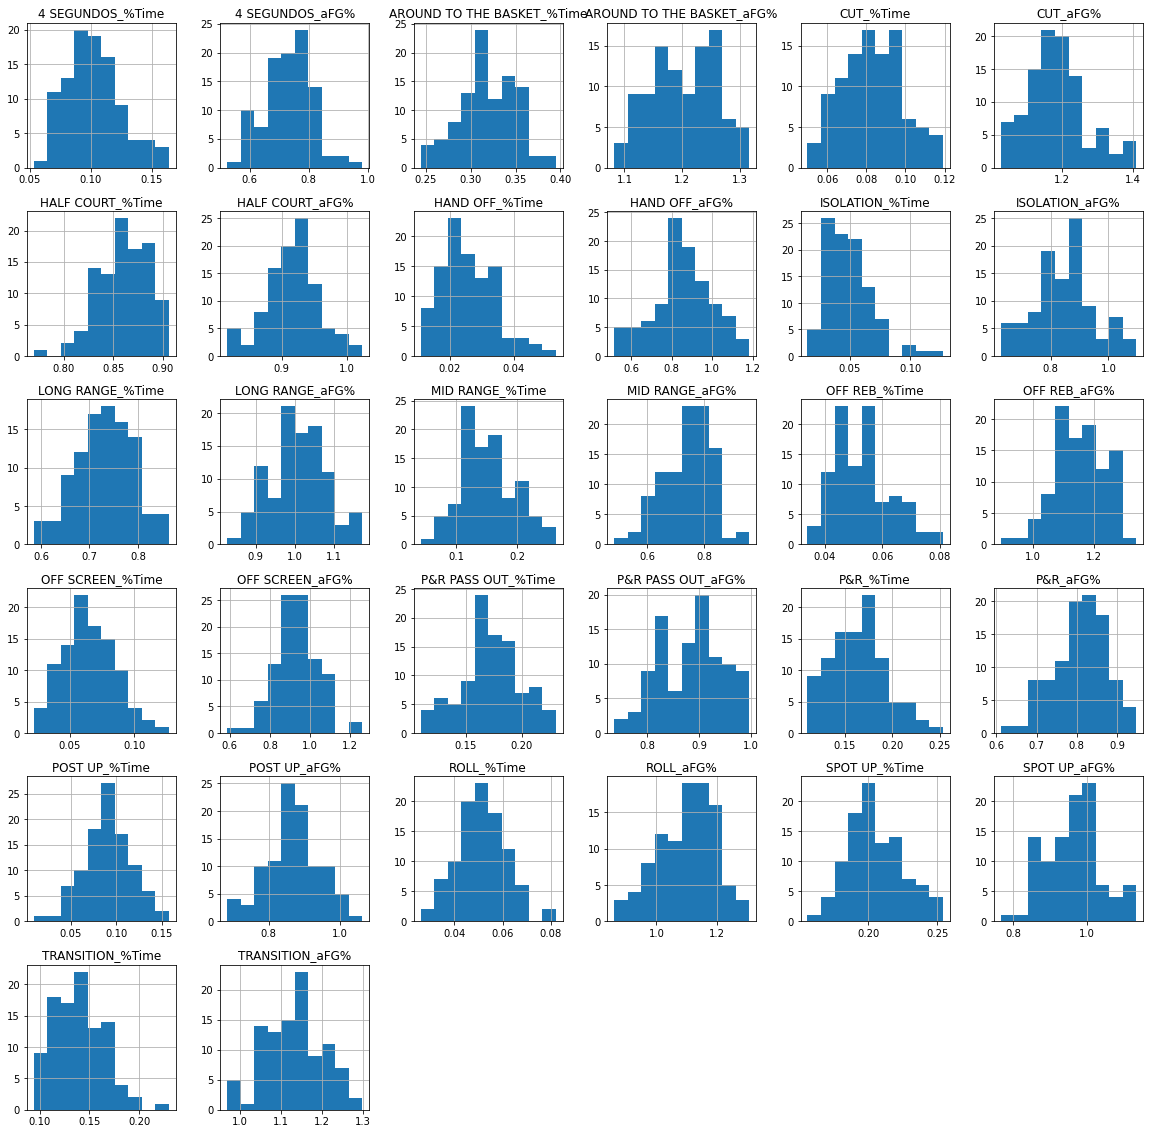

In [50]:
teams.drop(['Equipo'],axis=1).hist(figsize=(20,20))

plt.show()

### Estandarización del dataset

In [52]:
from sklearn import preprocessing

teamscluster=teams.copy()

teamscluster.drop(['Equipo'],axis=1,inplace=True)

##scaleo de los datos
trans = preprocessing.MinMaxScaler()
minmaxdata=trans.fit_transform(teamscluster)
teamscluster[teamscluster.columns]=minmaxdata

teamscluster.head()

4 SEGUNDOS_%Time  4 SEGUNDOS_aFG%  AROUND TO THE BASKET_%Time  \
0          0.144144         0.185590                    0.576159   
1          0.810811         0.593886                    0.311258   
2          0.297297         0.338428                    0.410596   
3          0.369369         0.532751                    0.649007   
4          0.486486         0.569869                    0.781457   

   AROUND TO THE BASKET_aFG%  CUT_%Time  CUT_aFG%  HALF COURT_%Time  \
0                   0.277778   0.217391  0.278215          0.610294   
1                   0.709402   0.594203  0.419948          0.919118   
2                   0.444444   0.463768  0.335958          0.823529   
3                   0.294872   0.202899  0.438320          0.897059   
4                   0.380342   0.956522  0.417323          0.911765   

   HALF COURT_aFG%  HAND OFF_%Time  HAND OFF_aFG%  ...  P&R_%Time  P&R_aFG%  \
0         0.225962        0.190476       0.896861  ...   0.443662  0.231454   
1         0.461538        0.404762       0.423019  ...   0.514085  0.670623   
2         0.562500        0.166667       0.518685  ...   0.450704  0.747774   
3         0.437500        0.261905       0.529148  ...   0.718310  0.789318   
4         0.485577        0.428571       0.281016  ...   0.176056  0.545994   

   POST UP_%Time  POST UP_aFG%  ROLL_%Time  ROLL_aFG%  SPOT UP_%Time  \
0       0.516779      0.034301    0.732143   0.197309       0.346939   
1       0.577181      0.287599    0.303571   1.000000       0.948980   
2       0.671141      0.593668    0.339286   0.569507       1.000000   
3       0.288591      0.221636    0.321429   0.345291       0.785714   
4       0.583893      0.208443    0.410714   0.295964       0.642857   

   SPOT UP_aFG%  TRANSITION_%Time  TRANSITION_aFG%  
0      0.692098          0.389706         0.219512  
1      0.534060          0.080882         0.576220  
2      0.514986          0.176471         0.719512  
3      0.553134          0.102941         0.753049  
4      0.498638          0.088235         0.542683  

[5 rows x 32 columns]

In [143]:
from sklearn.cluster import DBSCAN

clusterDB = DBSCAN(eps=1,min_samples=3,n_jobs=-1).fit(teamscluster)

In [144]:
##2 clusters más los excluidos (-1)
set(clusterDB.labels_)

teams['cluster']=clusterDB.labels_
print(teams['cluster'].value_counts())

-1    60
 0    35
 1     5
Name: cluster, dtype: int64


In [145]:
teams.drop(['Equipo'],axis=1).groupby('cluster').mean()

4 SEGUNDOS_%Time  4 SEGUNDOS_aFG%  AROUND TO THE BASKET_%Time  \
cluster                                                                  
-1               0.105350         0.731067                    0.321883   
 0               0.099914         0.747314                    0.317457   
 1               0.094000         0.655600                    0.293600   

         AROUND TO THE BASKET_aFG%  CUT_%Time  CUT_aFG%  HALF COURT_%Time  \
cluster                                                                     
-1                        1.194250   0.081950  1.175333           0.86185   
 0                        1.220829   0.087629  1.206229           0.85520   
 1                        1.175800   0.070600  1.135000           0.87660   

         HALF COURT_aFG%  HAND OFF_%Time  HAND OFF_aFG%  ...  P&R_%Time  \
cluster                                                  ...              
-1              0.912633        0.026233       0.855483  ...   0.170033   
 0              0.931314        0.025486       0.843400  ...   0.150143   
 1              0.872400        0.020600       0.893000  ...   0.200800   

         P&R_aFG%  POST UP_%Time  POST UP_aFG%  ROLL_%Time  ROLL_aFG%  \
cluster                                                                 
-1       0.809833       0.088767      0.859433    0.050967   1.081717   
 0       0.814400       0.095829      0.892600    0.051029   1.132429   
 1       0.753600       0.088600      0.838200    0.056200   1.088400   

         SPOT UP_%Time  SPOT UP_aFG%  TRANSITION_%Time  TRANSITION_aFG%  
cluster                                                                  
-1            0.205783      0.959300           0.13815         1.129483  
 0            0.206257      0.981229           0.14480         1.140371  
 1            0.196600      0.896000           0.12340         1.127800  

[3 rows x 32 columns]

In [166]:
from sklearn.cluster import OPTICS

clusterOPS = OPTICS(min_samples=3, max_eps=1,n_jobs=-1).fit(teamscluster)

In [167]:
set(clusterOPS.labels_)

teams['cluster']=clusterOPS.labels_
print(teams['cluster'].value_counts())

-1    86
 0     9
 1     5
Name: cluster, dtype: int64


In [161]:
teams.drop(['Equipo'],axis=1).groupby('cluster').mean()

4 SEGUNDOS_%Time  4 SEGUNDOS_aFG%  AROUND TO THE BASKET_%Time  \
cluster                                                                  
-1               0.102465         0.732942                    0.320407   
 0               0.111778         0.776333                    0.318778   
 1               0.094000         0.655600                    0.293600   

         AROUND TO THE BASKET_aFG%  CUT_%Time  CUT_aFG%  HALF COURT_%Time  \
cluster                                                                     
-1                        1.198558   0.084326  1.180663          0.861070   
 0                        1.256444   0.081333  1.244556          0.843444   
 1                        1.175800   0.070600  1.135000          0.876600   

         HALF COURT_aFG%  HAND OFF_%Time  HAND OFF_aFG%  ...  P&R_%Time  \
cluster                                                  ...              
-1              0.916128        0.026221       0.854686  ...   0.162930   
 0              0.951889        0.023444       0.816111  ...   0.160556   
 1              0.872400        0.020600       0.893000  ...   0.200800   

         P&R_aFG%  POST UP_%Time  POST UP_aFG%  ROLL_%Time  ROLL_aFG%  \
cluster                                                                 
-1       0.807360       0.090756      0.864837    0.050593   1.091430   
 0       0.851222       0.097222      0.936778    0.054778   1.186111   
 1       0.753600       0.088600      0.838200    0.056200   1.088400   

         SPOT UP_%Time  SPOT UP_aFG%  TRANSITION_%Time  TRANSITION_aFG%  
cluster                                                                  
-1            0.205826      0.965233          0.138930         1.127081  
 0            0.207222      0.987889          0.156556         1.194778  
 1            0.196600      0.896000          0.123400         1.127800  

[3 rows x 32 columns]